###  The data
156   images of soils are divided into 5 classes of soil type ('Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil')
### The goal
classify the image into 5 classe 
### two access to the solution
* at the image level- data set size 156 rows 3 columns (R,G,Bׁ) CNN    
* at the pixel level all images-  data set size 159744 (32*32*156)  3 columns (R,G,Bׁ) FCNN
* at the pixel level one image in any classe-  data set size 5120 (32*32*5)  3 columns (R,G,Bׁ) FCNN


# show  some soil image

Found 156 files belonging to 5 classes.
['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']


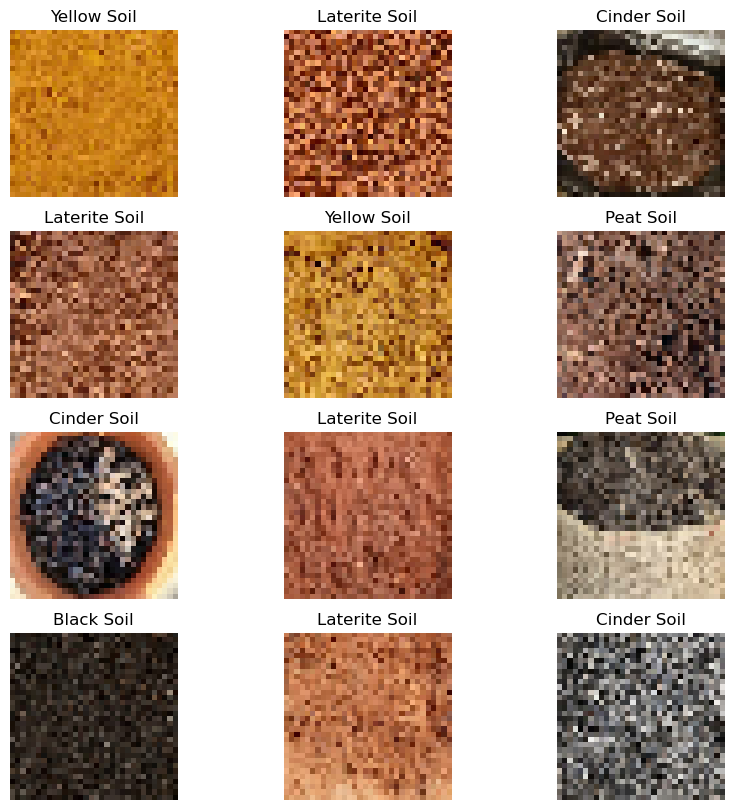

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

# read all image from directory
Soil_types_directory= 'C:/Users/user/Google Drive/TCD20/python/dataset/Soil types'
image_soil=tf.keras.utils.image_dataset_from_directory(
    Soil_types_directory,
    labels='inferred' ,
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    image_size=(32, 32))
   
# class 
class_names =image_soil.class_names
print(class_names)


### show sum image ###
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in image_soil.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Data preparation for machine learning models (image to DataFrame)
### at the pixel level all images

In [ ]:



##### soil image to df  #####
Soil_types_directory= 'C:/Users/user/Google Drive/TCD20/python/dataset/Soil types'
classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil']

classes_directory=os.path.join(Soil_types_directory,classes [0]) 
df_image= pd.DataFrame()
dict_images={}
classes2=-1
for  classes in classes:
    classes2=classes2+1
    images ={}
    print(classes,classes2)
    classes_directory=os.path.join(Soil_types_directory,classes) 
    for img_name in os.listdir(classes_directory):
        image_path=os.path.join(classes_directory,img_name)
        img_name=img_name[0:-4]
        img = tf.keras.utils.load_img(image_path, target_size=(32,32))
        images.update({ img_name:img})
        img_arr = tf.keras.utils.img_to_array(img)
        bands_list=[]
        for i in range(3):
            band= img_arr[:,:,i]
            n_pixels=band.size
            band_2d = band.reshape(n_pixels, 1)
            bands_list.append(band_2d)
      
        arr_columns = np.concatenate(bands_list, axis=1)
    
        # Create the pandas DataFrame
        # Get the pixel coordinates
        x_coords, y_coords = np.meshgrid(np.arange(band.shape[1]), np.arange(band.shape[0]))
        x_coords = x_coords.flatten()
        y_coords = y_coords.flatten()
    

        df = pd.DataFrame( arr_columns, columns=['r','g','b'])
       
        df=df.assign(classes=classes,classes2=classes2,image=img_name)
        df['x_int'] = x_coords
        df['y_int'] = y_coords
        df_image=pd.concat([df_image,df])
    dict_images.update({classes:images})  
   

df_image=df_image.assign(image_classes=df_image.classes+df_image.image)
df_image['image']=df_image['image'].apply(lambda x: str(x))
print(df_image.shape)
df_image.to_csv(os.path.join(Soil_types_directory,'all_image_32.csv'))
 

### at the pixel level all images

In [ ]:

Soil_types_directory= 'C:/Users/user/Google Drive/TCD20/python/dataset/Soil types'
data_image=pd.read_csv(os.path.join(Soil_types_directory,'all_image_64.csv'))
image_list= ['Black Soil2','Cinder Soil2', 'Laterite Soil2','Peat Soil2','Yellow Soil2']
      
df_image=data_image.loc[data_image['image_classes'].isin(image_list),:]
print(df_image.shape)
df_image.to_csv(os.path.join(Soil_types_directory,'Selecting_image_32.csv'))

### at the image level one image in any classe

In [ ]:
Soil_types_directory= 'C:/Users/user/Google Drive/TCD20/python/dataset/Soil types'
data_image=pd.read_csv(os.path.join(Soil_types_directory,'all_image_32.csv'))
df_image_mean_pxsele=data_image.groupby(by=['image_classes','classes'])[['r','g','b']].mean().reset_index()
print(df_image_mean_pxsele.shape)
df_image_mean_pxsele.to_csv(os.path.join(Soil_types_directory,'all_image_mean.csv'))

### Image pixel cleaning by cluster

In [ ]:
import plotly.express as px 
import ipywidgets as widgets
from sklearn.cluster import DBSCAN, OPTICS
import matplotlib.pyplot as plt

def DBSCAN_image(imge,list_colums=['r','g','b'],image_size=256,eps=0.1, min_samples=50):
    img_arr=imge_arr = tf.keras.utils.img_to_array(imge)
    bands_list=[]
    for i in range(3):
        band= img_arr[:,:,i]
        n_pixels=band.size
        band_2d = band.reshape(n_pixels, 1)
        bands_list.append(band_2d)
    arr_columns = np.concatenate(bands_list, axis=1)
    # Get the pixel coordinates
    x_coords, y_coords = np.meshgrid(np.arange(band.shape[1]), np.arange(band.shape[0]))
    x_coords = x_coords.flatten()
    y_coords = y_coords.flatten()
    

    df = pd.DataFrame( arr_columns, columns=['r','g','b'])
    df=df.assign(classes=classes,classes2=classes2,image=img_name)
    df['x_int'] = x_coords
    df['y_int'] = y_coords
    
    
    
    data=df
    fig = px.scatter_matrix(data, dimensions=["r", "g", "b"],template="plotly_white", height=800)
    fig.show()
    #clustering=DBSCAN(eps=eps, min_samples=min_samples,leaf_size=100).fit_predict(data[list_colums])
    clustering= OPTICS(cluster_method='dbscan',eps=eps,min_samples=min_samples,leaf_size=200).fit_predict(data[list_colums])
    data['clustering']=clustering
    data['clustering_str']= data['clustering'].apply(str)
    
    fig = px.scatter_matrix(data, dimensions=list_colums,color="clustering_str",template="plotly_white", height=800)#, color="species", 
    fig.show()
    plt.imshow(tf.keras.utils.img_to_array(imge).astype("uint8"))
    plt.axis("off")
    plt.show() 

    class_image=clustering.reshape(image_size,image_size)
    plt.imshow(class_image)
    plt.axis("off")
    plt.show()  
    
    
    big_cluster=data['clustering_str'].value_counts().idxmax()
    data2=data.query('clustering_str!=@big_cluster')
    data3=data.copy()
    data3[data3['clustering_str']!=big_cluster]=np.nan
 
    class_image= data3['clustering'].values.reshape(image_size,image_size)
    plt.imshow(class_image)
    plt.axis("off")
    plt.show()  


    return   data2




##### soil image to df  #####
Soil_types_directory= 'C:/Users/user/Google Drive/TCD20/python/dataset/Soil types'
classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil']

classes_directory=os.path.join(Soil_types_directory,classes [0]) 
df_image_cleaning=pd.DataFrame()
       
dict_images={}
classes2=-1
for  classes in classes:
    classes2=classes2+1
    images ={}
    print(classes,classes2)
    classes_directory=os.path.join(Soil_types_directory,classes) 
    for img_name in os.listdir(classes_directory):
        image_path=os.path.join(classes_directory,img_name)
        img_name=img_name[0:-4]
        imge = tf.keras.utils.load_img(image_path, target_size=(128,128))
        a=DBSCAN_image(imge,list_colums=['r','g','b'],image_size=128,eps=7, min_samples=50)  
        df_image_cleaning=pd.concat([ df_image_cleaning,a])
 
                                    
df_image_cleaning.to_csv(os.path.join(Soil_types_directory,'all_image_cleaning_128.csv'))
       

#####################################################################################
classes='Cinder Soil'
img=6
Soil_types_directory= 'C:/Users/user/Google Drive/TCD20/python/dataset/Soil types'
#mage_path=Soil_types_directory+'/Cinder Soil'+'/11'
image_path=os.path.join(Soil_types_directory,classes,str(img)+'.jpg')
#data_image=pd.read_csv(os.path.join(Soil_types_directory,'all_image_64.csv'))
#image_df=data_image.query("classes==@classes and image==@img")
imge = tf.keras.utils.load_img(image_path, target_size=(128,128))



a=DBSCAN_image(imge,list_colums=['r','g','b'],image_size=128,eps=7, min_samples=50) 
########################################################################################



# visualize and summary of data

In [27]:
import pandas as pd
import plotly.express as px 
import ipywidgets as widgets
Soil_types_directory= 'C:/Users/user/Google Drive/TCD20/python/dataset/Soil types'
data_image=pd.read_csv(os.path.join(Soil_types_directory,'all_image_64.csv'))
data_image_mean=pd.read_csv(os.path.join(Soil_types_directory,'all_image_mean.csv'))
data_image_Selecting=pd.read_csv(os.path.join(Soil_types_directory,'Selecting_image_64.csv'))
data_image_cleaning=pd.read_csv(os.path.join(Soil_types_directory,'all_image_cleaning_128.csv'))




In [36]:
a=data_image.groupby(by=['classes'])[['r','g','b']].mean().reset_index()

print(a)
print('#########################################################')
b=data_image_mean.groupby(by=['classes'])[['r','g','b']].mean().reset_index()

print(b)
print('#########################################################')
c=data_image_Selecting.groupby(by=['classes'])[['r','g','b']].mean().reset_index()

print(c)
print('#########################################################')
d=data_image_cleaning.groupby(by=['classes'])[['r','g','b']].mean().reset_index()

print(d)
##### bar plot ####



         classes           r           g           b
0     Black Soil   60.695251   51.286280   46.840369
1    Cinder Soil  120.296417  108.439739  104.931596
2  Laterite Soil  163.942997   94.390879   65.990228
3      Peat Soil  114.615635   92.503257   80.822476
4    Yellow Soil  180.129630  132.217172   64.397306
#########################################################
         classes           r           g           b
0     Black Soil   60.382780   50.683680   46.273193
1    Cinder Soil  119.705949  105.753394  101.653955
2  Laterite Soil  163.427360   94.759798   66.346053
3      Peat Soil  116.877230   93.927116   82.361548
4    Yellow Soil  180.018471  132.354214   65.482599
#########################################################
         classes           r           g          b
0     Black Soil   45.206055   44.280518  42.083740
1    Cinder Soil  117.452148   97.146729  82.914307
2  Laterite Soil  153.809082   65.613525  42.484863
3      Peat Soil   98.526367   79.516357

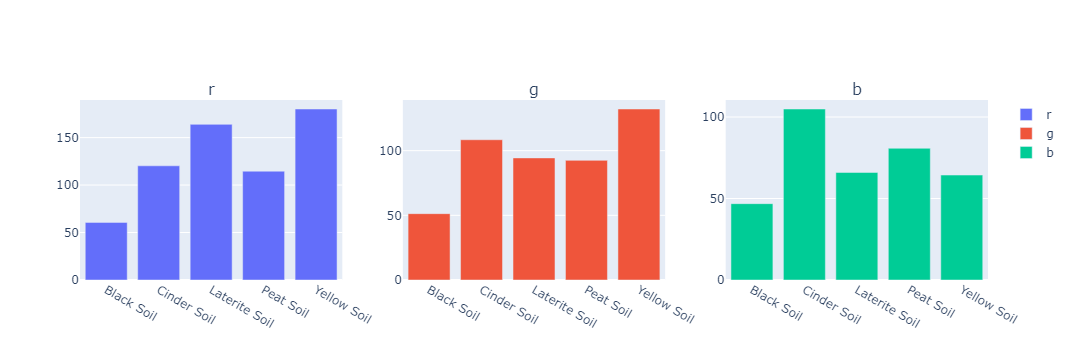

#############################################


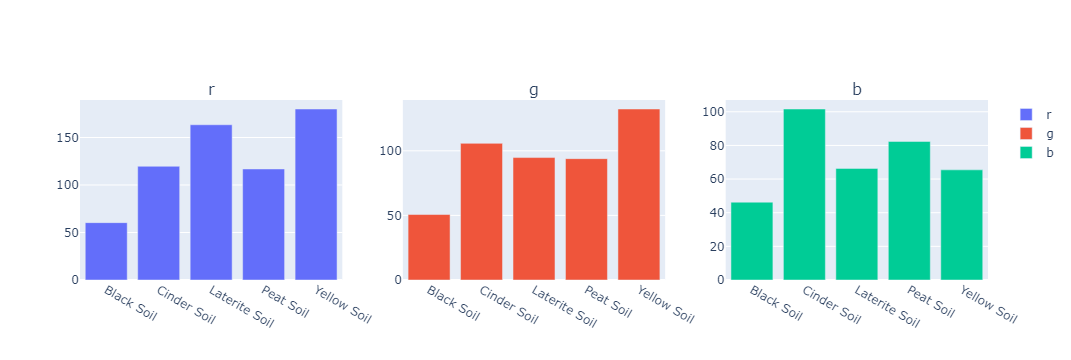

#############################################


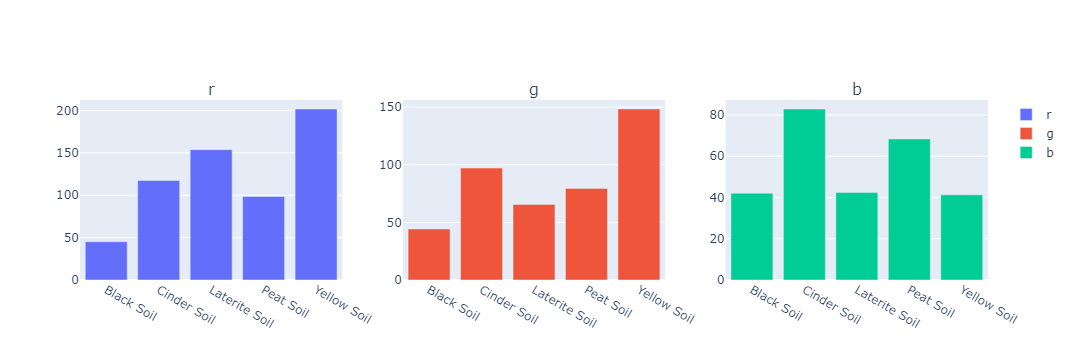

#############################################


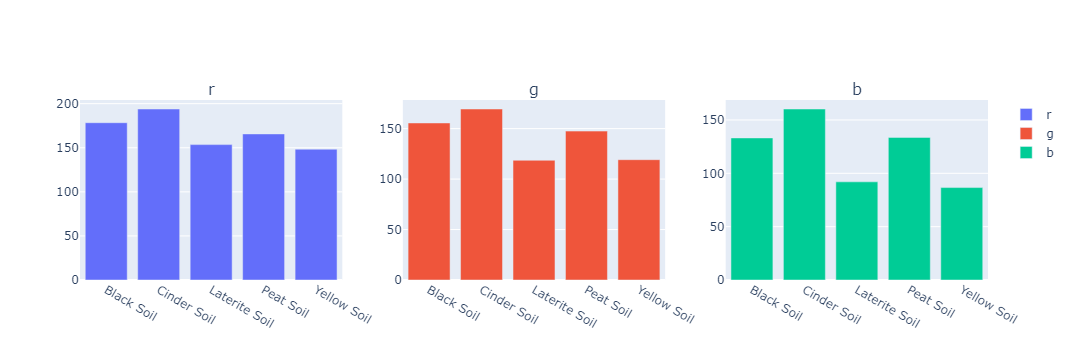

In [42]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=["r","g","b"])
                                 

fig.add_trace(go.Bar(x=a.classes,
                     y=a.r,
                     name="r"),
             row=1, col=1)
                    
fig.add_trace(go.Bar(x=a.classes,
                     y=a.g,
                     name="g"),
             row=1, col=2)
                    
fig.add_trace(go.Bar(x=a.classes,
                     y=a.b,
                     name="b"),
             row=1, col=3)      

fig.show()

print('#############################################')

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=["r","g","b"])
                                 

fig.add_trace(go.Bar(x=b.classes,
                     y=b.r,
                     name="r"),
             row=1, col=1)
                    
fig.add_trace(go.Bar(x=b.classes,
                     y=b.g,
                     name="g"),
             row=1, col=2)
                    
fig.add_trace(go.Bar(x=b.classes,
                     y=b.b,
                     name="b"),
             row=1, col=3)      
fig.show()

print('#############################################')

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=["r","g","b"])
                                 

fig.add_trace(go.Bar(x=c.classes,
                     y=c.r,
                     name="r"),
             row=1, col=1)
                    
fig.add_trace(go.Bar(x=c.classes,
                     y=c.g,
                     name="g"),
             row=1, col=2)
                    
fig.add_trace(go.Bar(x=c.classes,
                     y=c.b,
                     name="b"),
             row=1, col=3)      
fig.show()

print('#############################################')

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=["r","g","b"])
                                 

fig.add_trace(go.Bar(x=d.classes,
                     y=d.r,
                     name="r"),
             row=1, col=1)
                    
fig.add_trace(go.Bar(x=d.classes,
                     y=d.g,
                     name="g"),
             row=1, col=2)
                    
fig.add_trace(go.Bar(x=d.classes,
                     y=d.b,
                     name="b"),
             row=1, col=3)      
fig.show()

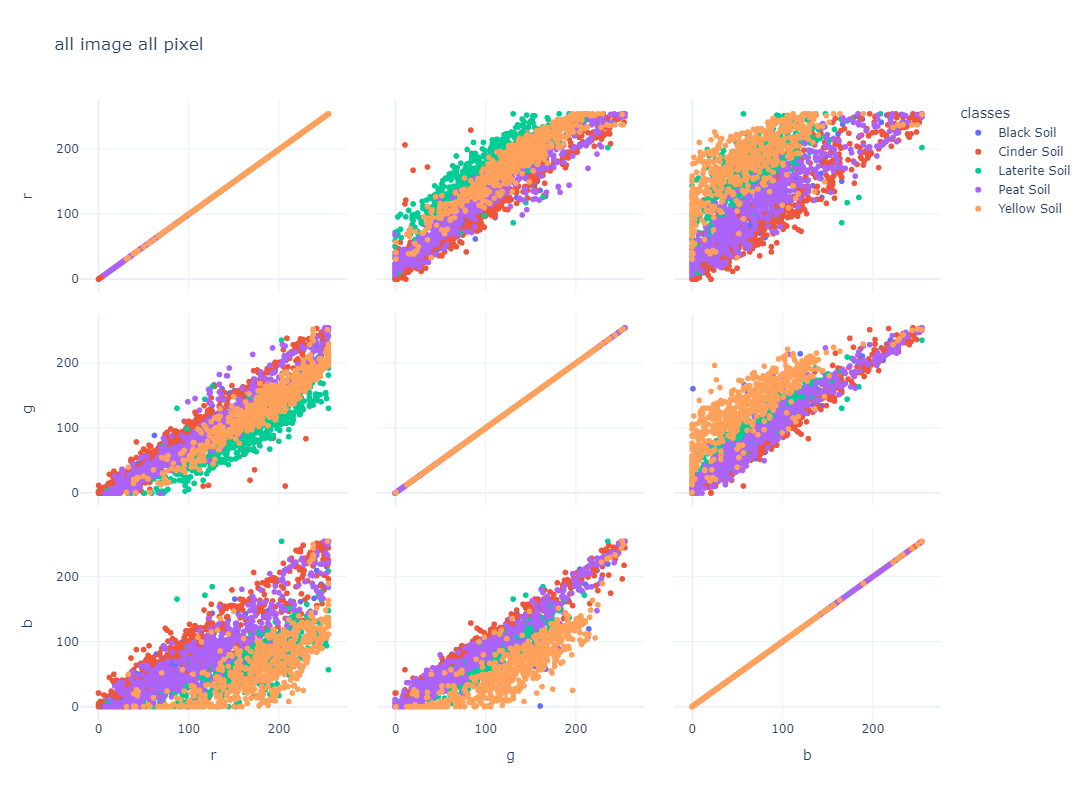

#########################################################


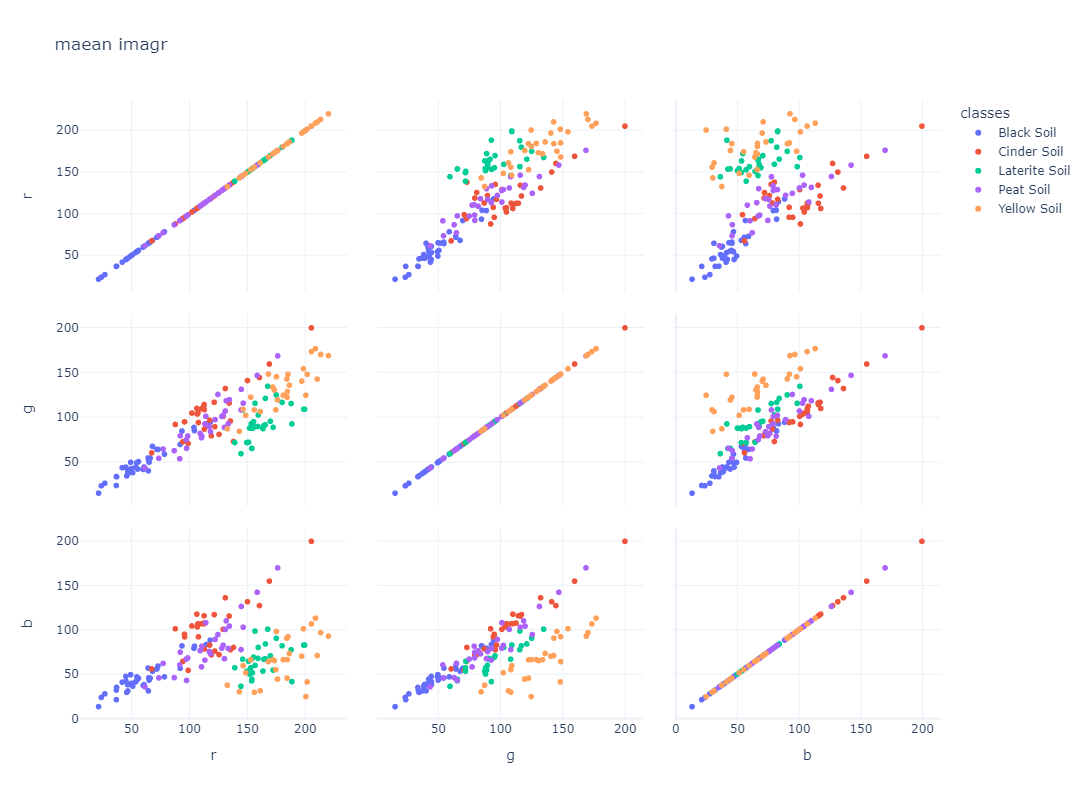

#########################################################


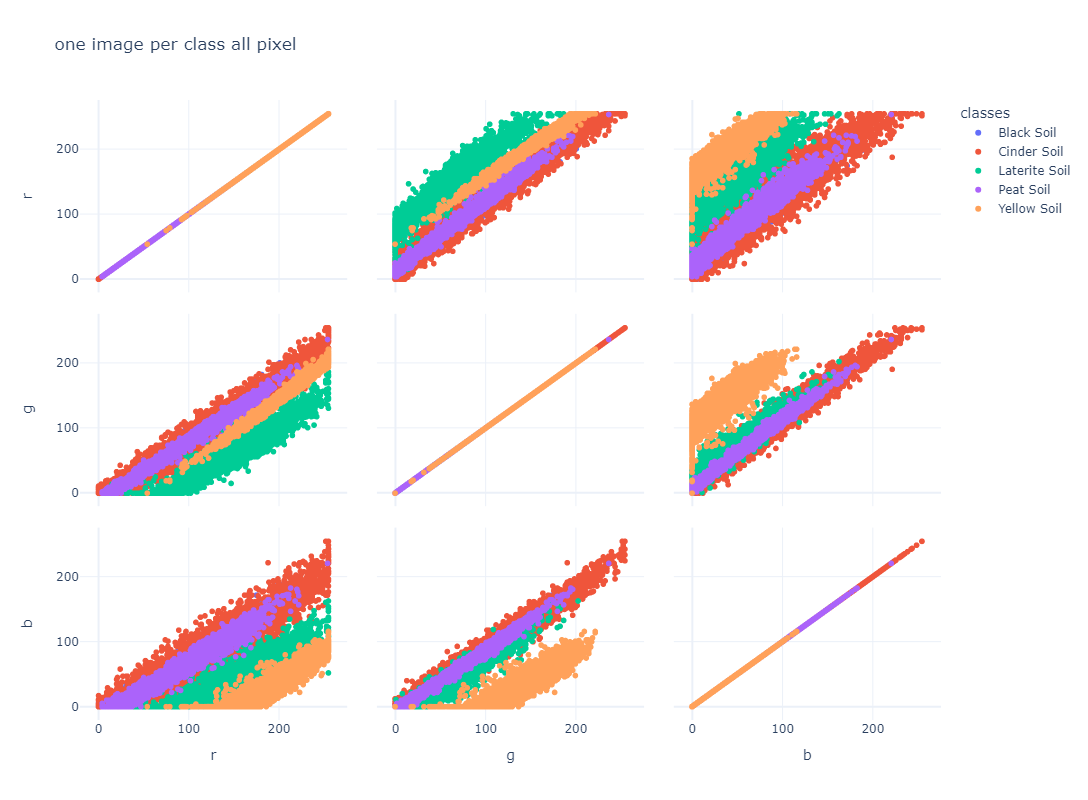

#########################################################


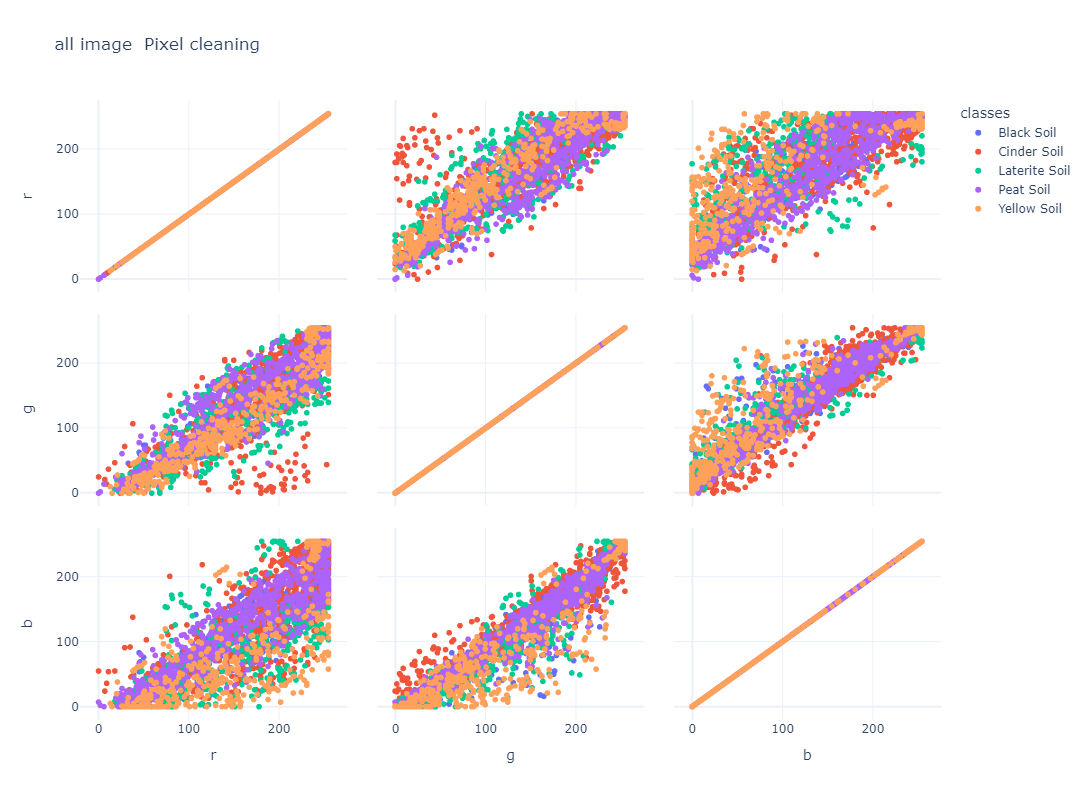

In [29]:
# scatter plot 

data_image=data_image.groupby(by=['classes']).sample(frac=0.005)
fig = px.scatter_matrix(data_image, dimensions=["r", "g", "b"],color="classes",template="plotly_white", height=800,
                       title="all image all pixel ")
fig.show()
print('#########################################################')
fig = px.scatter_matrix(data_image_mean, dimensions=["r", "g", "b"],color="classes",template="plotly_white", height=800,
                         title="maean imagr")
fig.show()
print('#########################################################')    
fig = px.scatter_matrix(data_image_Selecting, dimensions=["r", "g", "b"],color="classes",template="plotly_white", height=800,
                         title="one image per class all pixel ")
fig.show()
print('#########################################################')
data_image_cleaning=data_image_cleaning.groupby(by=['classes']).sample(frac=0.01)
fig = px.scatter_matrix(data_image_cleaning, dimensions=["r", "g", "b"],color="classes",template="plotly_white", height=800,
                         title="all image  Pixel cleaning" )
fig.show()


